In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
data=sns.load_dataset('tips')

## Basic Checks

In [5]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
data.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [9]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
data.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

# Domain report
#### Total_bill = The actual amount charged by the resturant to the customer
#### Tip = The amount customer pays to the person who attends them
#### sex = Is the customer is male or female . ( trans is now negleted )
#### smoker = If the customer is a smoker or not?
#### Day = The day of the week the customer choose to visit the resturant
#### time= the Time of the day the customer walks in
#### size = the size of the group of people 

# Exploratory Data Analysis

## Univeriate Analysis

In [11]:
# replacing some object values for ease of analysing
#data.smoker=data.smoker.map({'Yes':1,'No':0})

<AxesSubplot:xlabel='smoker', ylabel='count'>

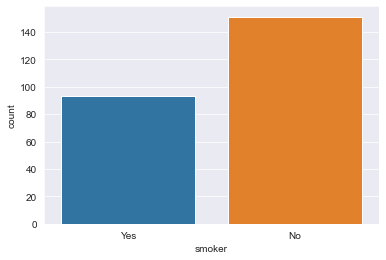

In [12]:
data.smoker.value_counts()
sns.countplot(x ='smoker' , data =data)

<AxesSubplot:xlabel='sex', ylabel='count'>

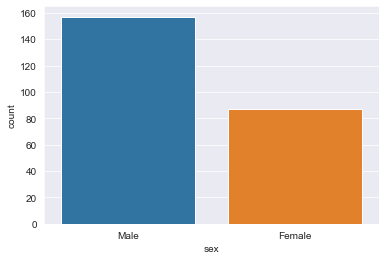

In [13]:
data.sex.value_counts()
sns.countplot(x='sex' , data = data)
# there is more males than females 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

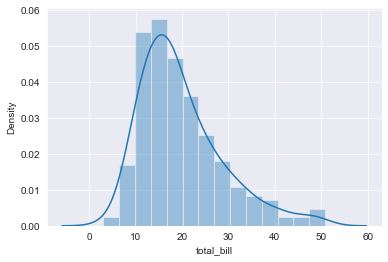

In [14]:
# Analysing total_bill
sns.distplot(data['total_bill'] )
# this is a normal distribution 
# most of the values are concentrated at 10 to 30 range

<AxesSubplot:xlabel='day', ylabel='Count'>

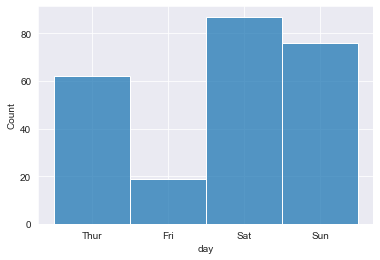

In [15]:
# Analysing day
sns.histplot(data.day)
# most people comes in sat 
# maximum revenue is on sat

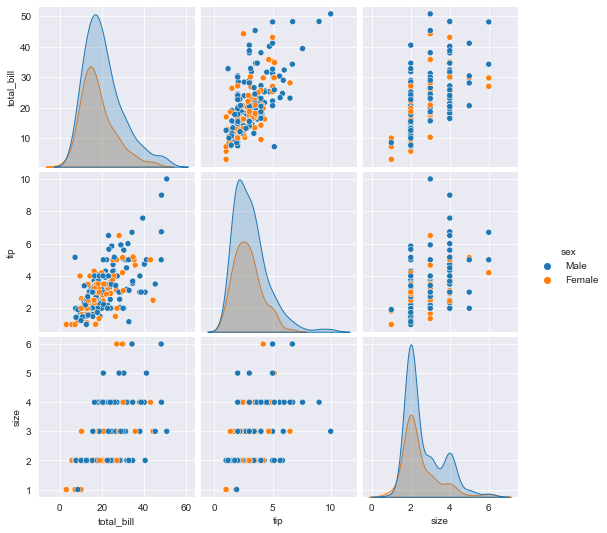

In [16]:
sns.pairplot(data , hue = 'sex')

<AxesSubplot:xlabel='time', ylabel='Count'>

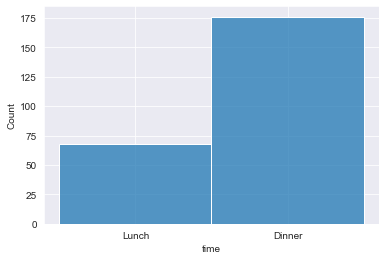

In [17]:
sns.histplot(data.time)
# Most people comes in for dinner

# Bivariative analysis
## Analysis of other variable wrt to Target variable (tips)

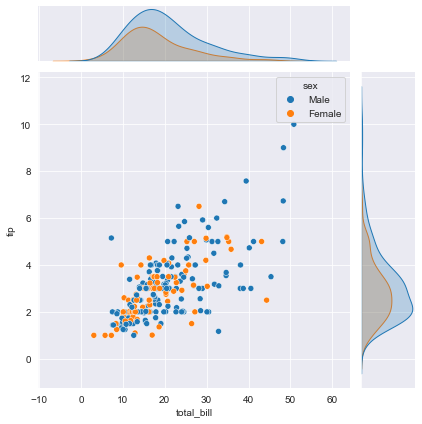

In [18]:
sns.jointplot(x='total_bill',y='tip',data=data,kind='scatter', color= 'r', hue = 'sex')
# higher the total bill the tips is also seems to be higher
# FEMALES tend to give smaller tip than males



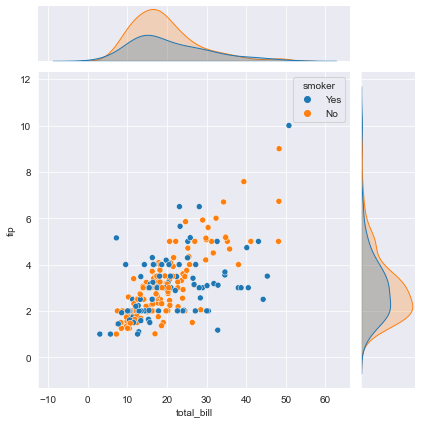

In [19]:
sns.jointplot(x='total_bill',y='tip',data=data, kind ='scatter', hue = 'smoker')
# Non smokers tends to leave behind than smokers


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

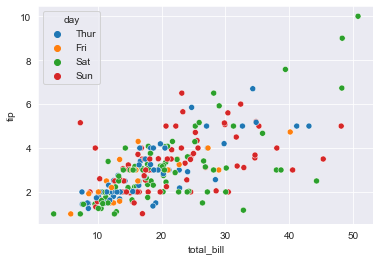

In [20]:
sns.scatterplot(x='total_bill',y='tip',data=data,hue='day')


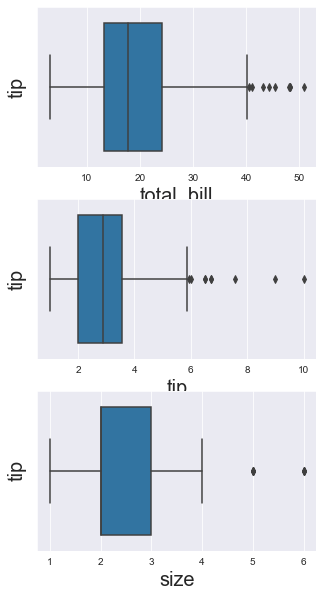

In [21]:
## Lets check outliers in any
box=data[['total_bill', 'tip','size']]
plt.figure(figsize=(5,10), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=260 :     # as there are 9 columns in the data
        ax = plt.subplot(3,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('tip',fontsize=20)
    plotnumber+=1
plt.show()
## There is outliers in all the values

# Data Preprocessing

In [22]:
# Checking Null values
data.isnull().sum()
# No null values


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [23]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
# Converting categorical values into numerical equivalent for easy handing
data.sex.unique()


['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [25]:
data.sex=data.sex.map({'Female':1,'Male':2})

In [26]:
data.smoker.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [27]:
data.smoker=data.smoker.map({'Yes':1,'No':0})

In [28]:
data.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [29]:
data.day = data.day.map({'Sun': 1, 'Sat' : 2, 'Thur' : 3, 'Fri' : 4})


In [30]:
data.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [31]:
data.time =data.time.map({'Dinner': 1, 'Lunch': 2})

In [32]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,1,1,2
1,10.34,1.66,2,0,1,1,3
2,21.01,3.50,2,0,1,1,3
3,23.68,3.31,2,0,1,1,2
4,24.59,3.61,1,0,1,1,4


In [33]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,2,0,2,1,3
240,27.18,2.00,1,1,2,1,2
241,22.67,2.00,2,1,2,1,2
242,17.82,1.75,2,0,2,1,2
243,18.78,3.00,1,0,3,1,2


# Building Model :

In [34]:
## scaling model 
from sklearn.preprocessing import StandardScaler

sc =StandardScaler()
data[['total_bill', 'tip','sex','smoker','day','size','time']]= sc.fit_transform(data[['total_bill', 'tip','sex','smoker','day','size','time']])
data

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,-1.179347,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,-1.179347,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,-1.179347,-0.621582,0.453383
3,0.438315,0.225754,0.744406,-0.784789,-1.179347,-0.621582,-0.600193
4,0.540745,0.443020,-1.343353,-0.784789,-1.179347,-0.621582,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,0.744406,-0.784789,-0.105613,-0.621582,0.453383
240,0.832275,-0.722971,-1.343353,1.274228,-0.105613,-0.621582,-0.600193
241,0.324630,-0.722971,0.744406,1.274228,-0.105613,-0.621582,-0.600193
242,-0.221287,-0.904026,0.744406,-0.784789,-0.105613,-0.621582,-0.600193


In [35]:
data.describe()

,total_bill,tip,sex,smoker,day,time,size
count,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16,-2.275047e-17,1.456030e-16,-1.333178e-16,-2.939361e-16,-1.410529e-16
std,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00,-1.343353e+00,-7.847892e-01,-1.179347e+00,-6.215816e-01,-1.653768e+00
25%,-7.247111e-01,-7.229713e-01,-1.343353e+00,-7.847892e-01,-1.179347e+00,-6.215816e-01,-6.001926e-01
50%,-2.241005e-01,-7.117518e-02,7.444059e-01,-7.847892e-01,-1.056132e-01,-6.215816e-01,-6.001926e-01
75%,4.886857e-01,4.086192e-01,7.444059e-01,1.274228e+00,9.681208e-01,1.608799e+00,4.533829e-01
max,3.492068e+00,5.070772e+00,7.444059e-01,1.274228e+00,2.041855e+00,1.608799e+00,3.614110e+00


In [37]:
## Skweness and Kurtosis test i.e check for normality
from scipy import stats
for column in box:
    print(stats.skew(box[column]),column)
    ## it shows all data are highly skewed since the values are above 1

1.1262346334818638 total_bill
1.4564266884221506 tip
1.4389653841920984 size


In [38]:
for column in box:
    print(stats.kurtosis(box[column]),column)

## tip has thin bell curve

1.1691681323851366 total_bill
3.5495519893455114 tip
1.6719276263625504 size


data.info()

<AxesSubplot:>

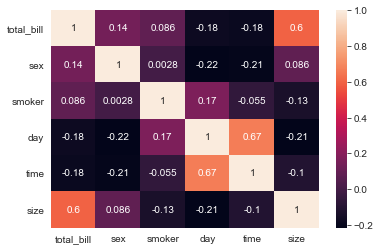

In [40]:
## Third step is Checking correlation i.e checking the linear relation between 2 variables.
sns.heatmap(data.drop('tip',axis=1).corr(),annot=True)

# Feature selection

In [41]:
## Feature selection is done to get that specific features which are important to predict the target varaible.

In [42]:
data.describe()

,total_bill,tip,sex,smoker,day,time,size
count,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16,-2.275047e-17,1.456030e-16,-1.333178e-16,-2.939361e-16,-1.410529e-16
std,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00,-1.343353e+00,-7.847892e-01,-1.179347e+00,-6.215816e-01,-1.653768e+00
25%,-7.247111e-01,-7.229713e-01,-1.343353e+00,-7.847892e-01,-1.179347e+00,-6.215816e-01,-6.001926e-01
50%,-2.241005e-01,-7.117518e-02,7.444059e-01,-7.847892e-01,-1.056132e-01,-6.215816e-01,-6.001926e-01
75%,4.886857e-01,4.086192e-01,7.444059e-01,1.274228e+00,9.681208e-01,1.608799e+00,4.533829e-01
max,3.492068e+00,5.070772e+00,7.444059e-01,1.274228e+00,2.041855e+00,1.608799e+00,3.614110e+00


In [43]:
## There is no std = 0 calumn to drop

In [57]:
data1 = data.copy()
data1.pop('tip')

0     -1.439947
1     -0.969205
2      0.363356
3      0.225754
4      0.443020
         ...   
239    2.115963
240   -0.722971
241   -0.722971
242   -0.904026
243    0.001247
Name: tip, Length: 244, dtype: float64

In [58]:
X= data1
y = data.tip

In [68]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.19 ,random_state=52)

In [69]:
from sklearn.linear_model import LinearRegression ## importing the model library 

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.
y_hat=LR.predict(X_test) ## prediciton from model

In [70]:
y_hat

array([ 0.94179811,  1.84634956, -0.67573495,  1.36061544, -0.72634053,
        0.00293315, -0.33094573,  1.16458748,  0.55192866, -0.03896335,
       -0.01606921, -0.39186271,  0.58093459, -0.1845562 , -0.99523204,
       -0.31404192, -0.11754766, -0.53012917, -0.16191742, -0.57238948,
       -0.52428208, -0.70794653, -0.58024108, -0.50591921,  1.35556109,
       -0.73136906, -0.47392827, -0.29936532, -0.7875139 , -0.60370519,
       -0.43924241,  0.68300993, -0.8310651 , -0.35706576,  0.33140146,
        1.51746962, -0.06796928, -0.34714106,  0.09274856,  0.04595698,
       -1.25370623, -0.50151928, -0.14270486,  1.27495452,  0.35773527,
       -0.34021801, -0.07266615])

In [71]:
## Model Evaluation
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.46547723844791555

In [72]:
test_score=r2_score(y_test,y_hat)
test_score

0.46285070679631213

In [73]:
X_train.shape,X_test.shape

((197, 6), (47, 6))

In [75]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.46)*(197-1)/(197-6-1)
train_adjusted_r2

0.44294736842105265

In [76]:
test_adjusted_r2 = 1-(1-0.46)*(47-1)/(47-6-1)

In [77]:
test_adjusted_r2

0.3789999999999999

In [78]:
print('intercept:', LR.intercept_) ## c value

intercept: -0.002238094648038043


In [79]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

slope: [ 0.62851963 -0.01179726 -0.04709933 -0.0549437   0.0731925   0.09435202]
